# Chapter 7 Multi-period asset pricing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
T = 10  # Time periods
DELTA = 0.95  # Discount factor
GAMMA = 2  # Risk aversion
MU = 0.02  # Expected consumption growth rate
SIGMA = 0.1  # Volatility of consumption growth
INITIAL_CONSUMPTION = 1  # Initial consumption level
DIVIDEND = 0.05  # Constant dividend amount

def utility(c):
    """Calculate utility for consumption level c"""
    return (c**(1 - GAMMA)) / (1 - GAMMA)

def simulate_consumption_growth():
    """Simulate lognormal consumption growth over T periods"""
    consumption = [INITIAL_CONSUMPTION]
    for t in range(T):
        growth = np.exp(MU + SIGMA * np.random.normal())
        consumption.append(consumption[-1] * growth)
    return consumption

def calculate_pricing_kernel(consumption):
    """Calculate pricing kernel over time"""
    pricing_kernel = [1]
    for t in range(1, T + 1):
        m_t = DELTA * (consumption[t] / consumption[t - 1])**(-GAMMA)
        pricing_kernel.append(pricing_kernel[-1] * m_t)
    return pricing_kernel

def calculate_price(pricing_kernel):
    """Calculate asset price using Recursive DDM"""
    dividends = np.array([DIVIDEND] * T)
    price = 0
    for t in range(1, T + 1):
        price += pricing_kernel[t] * dividends[t - 1]
    return price



In [2]:

consumption_growth = simulate_consumption_growth()
pricing_kernel = calculate_pricing_kernel(consumption_growth)
initial_price = calculate_price(pricing_kernel)
print("Multi-period Asset Price:", initial_price)

Multi-period Asset Price: 0.14734361616236197


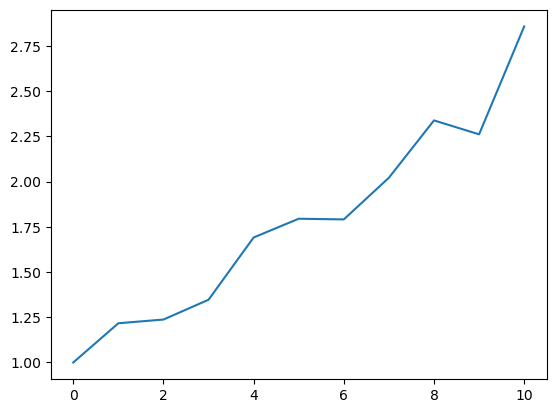

In [3]:
plt.plot(consumption_growth)

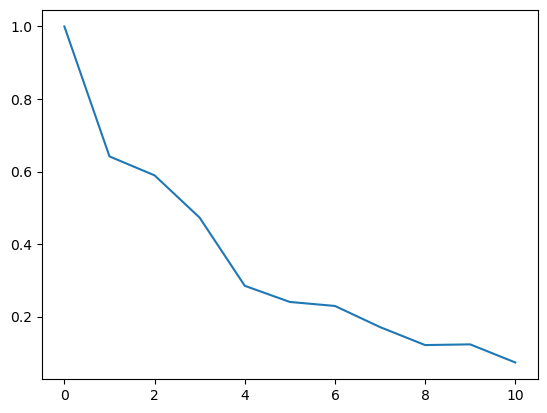

In [4]:
plt.plot(pricing_kernel)